In [6]:
hd_dir = "/home/hpc/cudahub/tracer/hybriddomain/"
modelFileName = 'problems/prosto_fazportret1'
conn_name = "dglconnection"
device_conf_name = "dgllogisticdevices"

In [7]:
import os
import sys
import inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
if hd_dir not in sys.path:
    sys.path.insert(0, hd_dir)
env_dir = os.path.join(hd_dir, 'spaces', 'math_space', "common")
if env_dir not in sys.path:
    sys.path.insert(0, env_dir)
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
from envs.hs.model.model_main import ModelNet as Model
from settings.settings_main import Settings

In [8]:
model = Model()
model.io.loadFromFile(modelFileName)
settings = Settings(model, conn_name, device_conf_name, conn_name, pf_prefix=currentdir)

INFO:block_main.block_io:DefaultBound not set
INFO:settings_main:device_conf_name
INFO:settings_main:dgllogisticdevices


Please enter password for user hpc:
········


In [9]:
#block0 = model.blocks[0]
#equation = model.equations[0]
#model.paramValues

In [10]:
from solvers.hs.remoterun.progresses.progress_notebook import ProgressNotebook
progress = ProgressNotebook(100, prefix='solving')
from solvers.hs.remoterun.remoterun import remoteProjectRun

clear_output()
test_name = settings.paths['model']['name']
bTest = widgets.Button(description="run %s " % (test_name))
def run(event):
    remoteProjectRun(settings, 1, progress)
bTest.on_click(run)
display(progress.progress)
display(bTest)

IntProgress(value=0, description='solving: ', max=99)

Button(description='run prosto_fazportret1 ', style=ButtonStyle())

INFO:remoterun:project_path
INFO:remoterun:prosto_fazportret1
INFO:remoterun:project_name
INFO:remoterun:prosto_fazportret1
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (publickey) successful!
INFO:remoterun:Checking if folder /home/hpc/Tracer/dglprojects exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/hpc/Tracer/dglprojects/settings exists...
INFO:remoterun:folder /home/hpc/Tracer/dglprojects/settings alredy exist
INFO:remoterun:Checking if folder /home/hpc/Tracer/dglprojects/settings/paths exists...
INFO:remoterun:folder /home/hpc/Tracer/dglprojects/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/hpc/Tracer/dglprojects/settings/device_conf exists...
INFO:remoterun:folder /home/hpc/Tracer/dglprojects/settings/device_conf alredy exist
INFO:remoterun:set

### Results:

In [11]:
import numpy as np
import re
import matplotlib.pyplot as plt
from ipywidgets import interactive


out_dir = os.path.join(currentdir,  modelFileName, "out")
listdir = os.listdir(out_dir)

print(listdir)

outs = [os.path.join(out_dir, file_name)
        for file_name in listdir
        if '.out' in file_name]
print(outs)
#with open(outs[0]) as f:
#    data = f.read()

['.ipynb_checkpoints']
[]


In [12]:
#Эта функция выбирает из какого фаула вытаскивать данные в папке out

def vibor(i):
    outs = [os.path.join(out_dir, file_name)
        for file_name in listdir
        if '.out' in file_name]
    with open(outs[i]) as f:
        data = f.read()
    lines = data.split('\n')
    result = {}

    for line in lines:
        if ':' in line:
            key, val = line.split(':')
            result[key]=val[1:]
        else:
            val = line
            result[key] += val  
    return key, val, result

In [13]:
#более не требуется
#lines = data.split('\n')
#result = {}

#for line in lines:
#    if ':' in line:
#        key, val = line.split(':')
#        result[key]=val[1:]
#    else:
#        val = line
#        result[key] += val
        

In [14]:
def gen(reuslt):
    for key in reuslt:
        step_0 = re.subn(r'\.\s+',".0,",result[key])[0]
        step_1 = re.subn(r'\s+',",",step_0)[0]
        step_2 = step_1.replace('.]','.0]')
        step_3 = step_2.replace('[,','[')

        yield((key, eval(step_3)))

In [15]:

key, val, result = vibor(0)
result_t = dict([(float(key), val) for key, val in gen(result)])
#print(result_t)
time = [key for key in result_t]
result_x = np.array([result_t[key] for key in result_t]).T


#это если система из более чем одного уравнения выбирается строка результата
key, val, result = vibor(1)
result_t = dict([(float(key), val) for key, val in gen(result)])
result_y = np.array([result_t[key] for key in result_t]).T
print (result_x)
#print(len(result_x[0]))
#print (result_x)
#print (result_y)

IndexError: list index out of range

##### U(x, t-fixed):

In [9]:
%matplotlib inline
def f(t):
    plt.plot(result_t[time[t]])
w = interactive(f,t=(0,100,1))
display(w)

interactive(children=(IntSlider(value=50, description='t'), Output()), _dom_classes=('widget-interact',))

##### U(x-fixed, t):

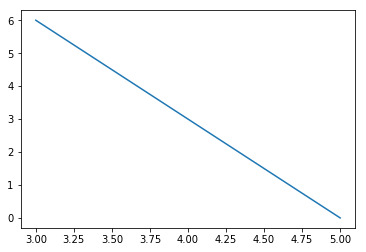

302


In [10]:
#фазовый портрет с устойчивым циклом
%matplotlib inline

#from pylab import *
import math

#Синяя линия сама траектория

plt.plot(result_x[10], result_y[10])













plt.show()
print(len(result_x[10]))